# Математические пакеты. Лабораторная работа №1 
#### Цель работы – изучить возможности библиотек Python для решения задач цифровой обработки сигналов.

### Задачи
1. Освоить Jupyter Notebook.
2. Выполнить загрузку аудио сигнала и построить огибающую (график).
3. Фильтрация (выбрать один из 4 основных типов фильтров). Получить фильтрованный сигнал.
4. Детектор сигнал/шум. Получить сигнал после детектирования
5. Эффект ”Эхо”. Получить сигнал после работы аудио-эффекта.
6. Бонусное задание: эффект ”Distortion”(классический вариант). Получить сигнал после работы аудио-эффекта.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import IPython.display as ipd
from scipy.io.wavfile import write, read
from scipy.signal import butter, filtfilt
from itertools import zip_longest
import numpy as np

## Выполнить загрузку аудио сигнала и построить огибающую (график).

/home/didges/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  """Entry point for launching an IPython kernel.


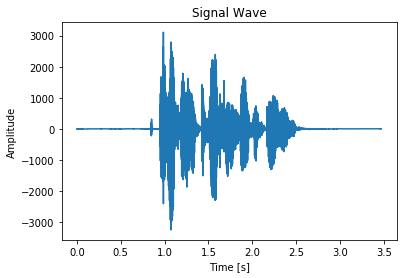

In [24]:
fd, signal = read("03-01-05-01-01-02-11_A11.wav", "r")
time = np.linspace(0, len(signal) / fd, num=len(signal))

plt.title("Signal Wave")
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.plot(time, signal)

In [3]:
def get_envelope(signal, n):
    envelope_arr = []
    count = len(signal) // n
    for i in range(count, len(signal), count):
        dot = sum(abs(x) for x in signal[i-count:i]) / count
        envelope_arr.append(dot)
    return envelope_arr

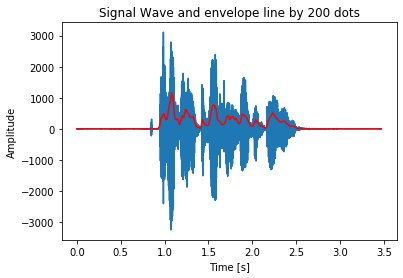

In [25]:
n = 200
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title(f"Signal Wave and envelope line by {n} dots")
plt.plot(time, signal)
plt.plot(np.linspace(0, len(signal) / fd, num=n), get_envelope(signal, n), color='r')

## Фильтр высоких частот

In [5]:
def high_signal_filter(fd, fs, m, signal):
    wn = 2*fs/fd
    b, a = butter(m, wn, 'highpass')
    filtedData = filtfilt(b, a, signal)
    return filtedData.astype(np.int16)

In [6]:
filtered_signal = high_signal_filter(fd, 2000, 1, signal)
write("filtered_signal.wav", fd, filtered_signal)

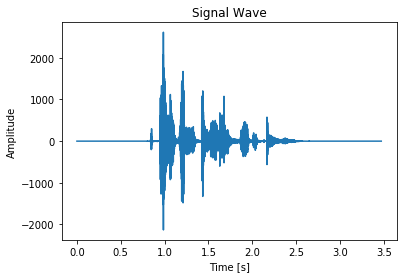

In [26]:
plt.title("Signal Wave")
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.plot(time, filtered_signal)

In [8]:
print("Original wave")
ipd.Audio('03-01-05-01-01-02-11_A11.wav')

Original wave


In [9]:
print("filtered wave")
ipd.Audio("filtered_signal.wav")

filtered wave


## Амплитудный детектор

In [10]:
mid = sum(abs(x) for x in signal)/len(signal) 

In [11]:
th = 0.3*mid
k = 50

In [12]:
amplitude_det = []
need_rec = False
count_inc = 0
count_dec = 0
for i in signal:
    if abs(i) > th:
        count_inc += 1
        count_dec = 0
    else:
        count_dec += 1
        count_inc = 0
        
    if count_inc >= k:
        need_rec = True
    if count_dec >= k:
        need_rec = False
        
    if need_rec:
        amplitude_det.append(i)
    else:
        amplitude_det.append(0)
write("amplitude.wav", fd, np.array(amplitude_det).astype(np.int16))

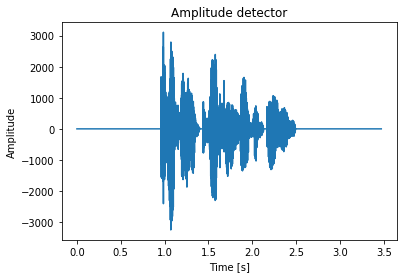

In [27]:
plt.title("Amplitude detector")
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.plot(time, amplitude_det)

In [14]:
print("Amplitude detector wave")
ipd.Audio("amplitude.wav")

Amplitude detector wave


## Ревербератор

In [15]:
def low_signal_filter(fd, fs, m, signal):
    wn = 2*fs/fd
    b, a = butter(m, wn, 'lowpass')
    filtedData = filtfilt(b, a, signal)
    return filtedData.astype(np.int16)

In [17]:
d = 50000
gamma = 0.4
lines = 8
D = [int(d*2**((1-i)/lines)) for i in range(1, lines+1)]
alpha = [0.9/(2**i) for i in range(lines)]

delay_lines = [[0 for j in range(i)] + list(signal) for i in D]
delay_lines = [[i*a for i in line] for a, line in zip(alpha, delay_lines)]

sum_delay_lines = [sum(x) for x in zip_longest(*delay_lines, fillvalue=0)]
filter_sum = low_signal_filter(fd, 2500, 1, sum_delay_lines)
gamma_lines = [i*gamma for i in filter_sum]

target_signal = [sum(x) for x in zip_longest(gamma_lines, signal, fillvalue=0)] 

write("echo.wav", fd, np.array(target_signal).astype(np.int16))

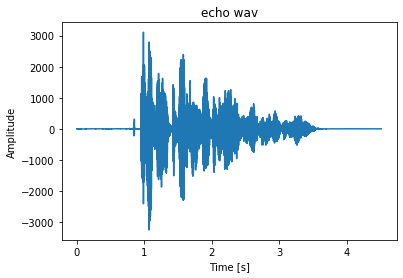

In [28]:
plt.title("echo wav")
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
time_echo = np.linspace(0, len(target_signal)/fd, num=len(target_signal))
plt.plot(time_echo, target_signal)
ipd.Audio("echo.wav")

## distorsion

In [19]:
th = 2000
max_value = 7000

In [20]:
def distortion(signal):
    dist_signal = []
    for i in signal:
        if abs(i) <= th:
            dist_signal.append(i)
        else:
            dist_signal.append(max_value*np.sign(i))
    return dist_signal

In [21]:
dist_signal = distortion(signal)
write("distortion.wav", fd, np.array(dist_signal).astype(np.int16))

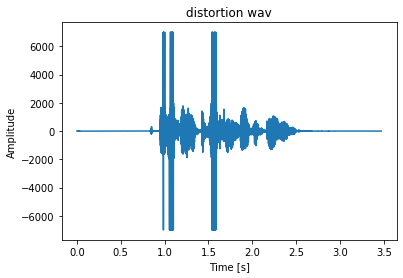

In [29]:
plt.title("distortion wav")
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
time_echo = np.linspace(0, len(target_signal)/fd, num=len(target_signal))
plt.plot(time, dist_signal)
ipd.Audio("distortion.wav")

Вывод: по ходу выполнения лр были изучены возможности библиотек Python для решения задач цифровой обработки сигналов.